Дегалевич Д.А., Стенин Л.Б

# Метод главных компонент

### Алгоритм PCA

Дана матрица данных $D$ и коэффициент $\alpha$:
1. вычисляем среднее значение $\mu = \frac{1}{n} \sum \limits_{i=1}^{n} x_i$;
2. центруем матрицу данных $Z = D - 1 \cdot \mu^T$;
3. вычисляем матрицу ковариаций $K = \frac{1}{n} (Z^T Z)$;
4. вычисляем собственные значения $(\lambda_1, \lambda_2, \ldots, \lambda_d)$;
5. вычисляем собственные векторы $U = (u_1 u_2 \ldots u_d)$;
6. вычисляем долю общей дисперсии $f(r) = \frac{\sum_{i=1}^{r} \lambda_i} {\sum_{i=1}^{n} \lambda_i}$;
7. выбираем наименьший $r$ так, чтобы $f(r) \geq \alpha$;
8. выбираем $r$ первых векторов $U = (u_1 u_2 \ldots u_r)$;
9. уменьшаем признаковое пространство: $A = \{ a_i \: | \: a_i = U_r^T x_i, \: для \: i = 1, \ldots, n \} $

Реализуйте алгоритм для первых двух главных компонент. Найдите $\lambda_1$, $\lambda_2$ и $u_1$, $u_2$. Спроецируйте данные на плоскость образуемую этими векторами, визуализируйте полученные результаты c метками классов. Сравните реузльтаты с методом PCA из библиотеки sklearn.decomposition.

В качестве данных возьмите изображения с рукописными цифрами.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline

data = load_iris()
X = data['data']
Y =data['target']

# Интерпретация компонент
## Корреляция с исходными признаками
Главные компоненты являются линейными кобинациями исходных признаков. В этой связи необходимо оценить связь каждой компоненты с исходными признаками.

Рассчет взаимосвязи будем проводить с помощью корреляции Пирсона:

\begin{equation}
r_{jk} = \frac{\sum_{i=1}^n (x_{ij} - \bar{x}_j) (x_{ik}' - \bar{x}_k')}{\sqrt{\sum_{i=1}^n (x_{ij} - \bar{x}_j)^2 \sum_{i=1}^n (x_{ik}' - \bar{x}_k')^2}}
\end{equation}

где
$\bar{x}_j$ - среднее значение $j$-го признака,
$\bar{x}_k'$ - среднее значение проекции на $k$-ю главную компоненту,
$n$ - количество объектов.

Отметим, что корреляция Пирсона изменяется от $-1$ до $+1$. Она равна $0$ в случае, когда величины независимы, и $\pm 1$, если они линейно зависимы.

Определите по коэффициентам корреляции, какие признаки в какую компоненту вошли.

In [2]:
def PCA(x, a):
    mu = np.mean(x, axis = 0)
    Z = x - mu
    covariation = np.cov(Z.transpose())
    eigenvalues, U = np.linalg.eig(covariation)
    sum_eigval = np.sum(eigenvalues)
    r = float('inf')
    for i in range(1,x.shape[1]+1):
        f = np.sum(eigenvalues[:i]) / sum_eigval
        print('Доля общей дисперсии для ',i,' компоненты = ',f)
    for i in reversed(range(x.shape[1]+1)):
        f = np.sum(eigenvalues[:i]) / sum_eigval  
        if f >= a :  r = i
    Ur = U[:,:r]
    return np.dot(Z, Ur)

In [4]:
res = PCA(X,0.97)
print(res)

Доля общей дисперсии для  1  компоненты =  0.9246187232017269
Доля общей дисперсии для  2  компоненты =  0.9776852063187949
Доля общей дисперсии для  3  компоненты =  0.9947878161267246
Доля общей дисперсии для  4  компоненты =  1.0
[[-2.68412563 -0.31939725]
 [-2.71414169  0.17700123]
 [-2.88899057  0.14494943]
 [-2.74534286  0.31829898]
 [-2.72871654 -0.32675451]
 [-2.28085963 -0.74133045]
 [-2.82053775  0.08946138]
 [-2.62614497 -0.16338496]
 [-2.88638273  0.57831175]
 [-2.6727558   0.11377425]
 [-2.50694709 -0.6450689 ]
 [-2.61275523 -0.01472994]
 [-2.78610927  0.235112  ]
 [-3.22380374  0.51139459]
 [-2.64475039 -1.17876464]
 [-2.38603903 -1.33806233]
 [-2.62352788 -0.81067951]
 [-2.64829671 -0.31184914]
 [-2.19982032 -0.87283904]
 [-2.5879864  -0.51356031]
 [-2.31025622 -0.39134594]
 [-2.54370523 -0.43299606]
 [-3.21593942 -0.13346807]
 [-2.30273318 -0.09870885]
 [-2.35575405  0.03728186]
 [-2.50666891  0.14601688]
 [-2.46882007 -0.13095149]
 [-2.56231991 -0.36771886]
 [-2.639534

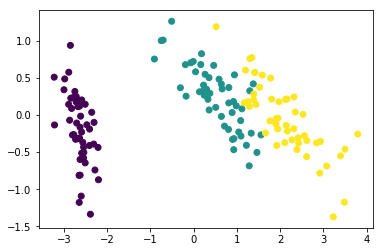

In [5]:
plt.scatter(res[:,0], res[:,1], c=Y)

##### На основе полученных собственных значений ковариационной матриы $K$ постройте график зависимости покрываемой дисперсии трансформированных данных от количества главных компонент.

In [6]:
from sklearn import decomposition

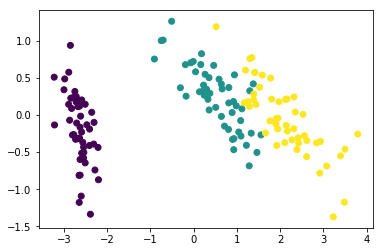

In [7]:
mu = np.mean(X, axis = 0)
Z = X - mu
pca = decomposition.PCA(n_components=2)
pca.fit(Z)
X_pca = pca.transform(Z)

plt.scatter(X_pca[:,0], X_pca[:,1]*-1, c = Y)
plt.show()